In [636]:
# Install python packages and import libraries
# !pip install pandas
import pandas as pd
from scipy import stats
import numpy as np
from scipy import stats
import statistics
import matplotlib.pyplot as plt

In [637]:
df=pd.read_csv('mining_dataset.csv') 
df.head(5)

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235",...,"250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
1,2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532",...,"248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2,2017-03-10 01:00:00,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874",...,"248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
3,2017-03-10 01:00:00,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487",...,"251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
4,2017-03-10 01:00:00,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136",...,"248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"


#### Finding Each column mean max and min value

In [647]:
for i in column:
    single_column = df[i].apply(pd.to_numeric).to_numpy()
    
    print(i,'mean:', statistics.mean(single_column))
    print(i,'max:', max( single_column))
    print(i,'min:', min( single_column))
    

% Iron Feed mean: 56.294730290456435
% Iron Feed max: 65.78
% Iron Feed min: 42.74
% Silica Feed mean: 14.651732975347816
% Silica Feed max: 33.4
% Silica Feed min: 1.31
Starch Flow mean: 2869.142008603183
Starch Flow max: 6270.158798122075
Starch Flow min: 54.595482593457774
Amina Flow mean: 488.145318067999
Amina Flow max: 736.9823777777779
Amina Flow min: 242.9274770114956
Ore Pulp Flow mean: 397.5783855249913
Ore Pulp Flow max: 418.0702322568756
Ore Pulp Flow min: 376.83760419287273
Ore Pulp pH mean: 9.767641691106972
Ore Pulp pH max: 10.80737033492778
Ore Pulp pH min: 8.753389181654445
Ore Pulp Density mean: 1.6803801954338393
Ore Pulp Density max: 1.8324298888888888
Ore Pulp Density min: 1.5199258936044446
Flotation Column 01 Air Flow mean: 280.1515794007248
Flotation Column 01 Air Flow max: 312.2954154883767
Flotation Column 01 Air Flow min: 175.88557916565168
Flotation Column 02 Air Flow mean: 277.15970940304453
Flotation Column 02 Air Flow max: 309.88776666666666
Flotation Col

#### - Box Plot

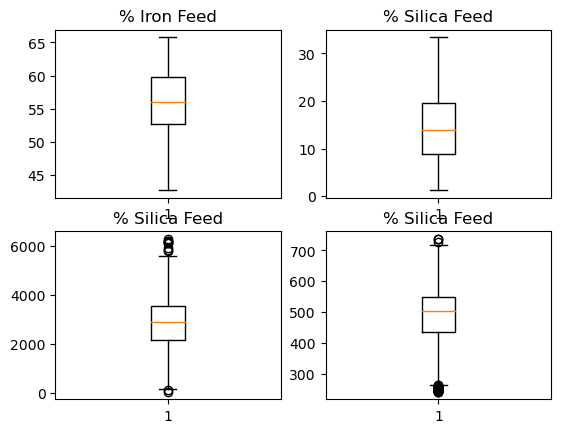

In [64]:
##Box Plot
for i in range(1):
    figure, axis = plt.subplots(2,2) 
    # silica Feed
    axis[0, 0].boxplot(df[column[i]].apply(pd.to_numeric).to_numpy())
    axis[0, 0].set_title(column[i])

    # For Cosine Function
    axis[0, 1].boxplot(df[column[i+1]].apply(pd.to_numeric).to_numpy())
    axis[0, 1].set_title(column[i+1])

    # For Tangent Function
    axis[1, 0].boxplot(df[column[i+2]].apply(pd.to_numeric).to_numpy())
    axis[1, 0].set_title(column[i+1])

    # For Tanh Function
    axis[1, 1].boxplot(df[column[i+3]].apply(pd.to_numeric).to_numpy())
    axis[1, 1].set_title(column[i+1])

### - Outlier removal function

In [ ]:
#outlier removal
def outr(c):
    
    q3 = df[c].apply(pd.to_numeric).quantile(0.75)  
    q1 = df[c].apply(pd.to_numeric).quantile(0.25)
    IQR = q3 - q1
    lower_limit = q1 - (IQR * 1.5)
    print('Lower Limit:',lower_limit)
    upper_limit = q3 + (IQR * 1.5)
    print('Upper Limit:', upper_limit)

    df[c].values[df[c].apply(pd.to_numeric) > upper_limit] = upper_limit
    df[c].values[df[c].apply(pd.to_numeric) < lower_limit] = lower_limit
    return

for o in column:
    outr(o)

In [4]:
column=['% Iron Feed','% Silica Feed', 'Starch Flow', 'Amina Flow', 'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density', 'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow', 'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow', 'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow', 'Flotation Column 07 Air Flow', 'Flotation Column 01 Level', 'Flotation Column 02 Level', 'Flotation Column 03 Level', 'Flotation Column 04 Level', 'Flotation Column 05 Level', 'Flotation Column 06 Level', 'Flotation Column 07 Level', '% Iron Concentrate', '% Silica Concentrate']

for i in column:
    df[i] = df[i].str.replace(',','.')



# Week 2 - Data Pre-treatment

In [5]:
df['date'] = pd.to_datetime(df['date'])

for i in column:
    df[i] = pd.to_numeric(df[i], errors='coerce')
    
df['date']

0        2017-03-10 01:00:00
1        2017-03-10 01:00:00
2        2017-03-10 01:00:00
3        2017-03-10 01:00:00
4        2017-03-10 01:00:00
                 ...        
737448   2017-09-09 23:00:00
737449   2017-09-09 23:00:00
737450   2017-09-09 23:00:00
737451   2017-09-09 23:00:00
737452   2017-09-09 23:00:00
Name: date, Length: 737453, dtype: datetime64[ns]

In [ ]:
#resampling based on hour

In [6]:
f=df.resample('h', on='date').mean()
f
# save preprocess data file as csv
# f.to_csv('afterdownsampling.csv', index=False)


,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
date,,,,,,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,55.20,16.98,3162.625026,578.786678,398.753368,10.113487,1.729558,251.166672,250.226086,250.178287,...,250.208184,450.383776,446.891845,450.474523,449.912259,455.792161,464.383310,450.532747,66.91,1.31
2017-03-10 02:00:00,55.20,16.98,3133.256389,537.219661,399.871822,10.129742,1.667784,249.880589,250.214050,250.033317,...,249.897572,449.373361,450.249356,450.081222,450.328806,448.722983,455.501528,451.387700,67.06,1.11
2017-03-10 03:00:00,55.20,16.98,3479.482944,591.906744,398.763806,10.048403,1.732711,250.161328,250.104167,250.046350,...,250.484183,449.972878,450.868711,450.901822,451.145822,451.134189,459.981311,450.296722,66.97,1.27
2017-03-10 04:00:00,55.20,16.98,3228.036436,593.170106,399.866983,9.918614,1.731056,250.208772,250.204761,250.120861,...,250.157622,487.940706,491.462111,487.387206,494.528183,495.664011,502.763850,494.939889,66.75,1.36
2017-03-10 05:00:00,55.20,16.98,3327.280739,619.710806,399.615089,9.746029,1.765879,249.917800,250.160494,250.013500,...,250.078639,549.031539,549.983156,549.459572,549.975483,549.512533,560.696300,550.271772,66.63,1.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-09 19:00:00,49.75,23.20,3327.047776,497.211189,380.847200,9.176166,1.660871,301.565561,300.169133,299.900722,...,298.736661,397.781583,498.753311,403.858956,398.930467,502.971728,399.468911,400.559511,65.05,1.65
2017-09-09 20:00:00,49.75,23.20,4225.800333,508.963856,381.112889,9.387541,1.691996,300.050172,299.967839,299.906550,...,303.599269,399.928567,499.648950,399.208611,399.967122,501.624533,398.905006,400.486233,64.83,1.71
2017-09-09 21:00:00,49.75,23.20,2808.214692,517.748822,381.064411,9.771277,1.735647,299.814289,299.801561,299.973161,...,309.875439,399.961433,500.484917,471.827489,399.931033,500.223311,401.899806,400.556333,64.29,1.80


In [7]:
f=pd.read_csv('afterdownsampling.csv') 
f.head(5)
df=f
target = '% Silica Concentrate'
X = df.drop(target,axis=1)
y = df[target]

In [8]:
df

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,55.20,16.98,3162.625026,578.786678,398.753368,10.113487,1.729558,251.166672,250.226086,250.178287,...,250.208184,450.383776,446.891845,450.474523,449.912259,455.792161,464.383310,450.532747,66.91,1.31
1,55.20,16.98,3133.256389,537.219661,399.871822,10.129742,1.667784,249.880589,250.214050,250.033317,...,249.897572,449.373361,450.249356,450.081222,450.328806,448.722983,455.501528,451.387700,67.06,1.11
2,55.20,16.98,3479.482944,591.906744,398.763806,10.048403,1.732711,250.161328,250.104167,250.046350,...,250.484183,449.972878,450.868711,450.901822,451.145822,451.134189,459.981311,450.296722,66.97,1.27
3,55.20,16.98,3228.036436,593.170106,399.866983,9.918614,1.731056,250.208772,250.204761,250.120861,...,250.157622,487.940706,491.462111,487.387206,494.528183,495.664011,502.763850,494.939889,66.75,1.36
4,55.20,16.98,3327.280739,619.710806,399.615089,9.746029,1.765879,249.917800,250.160494,250.013500,...,250.078639,549.031539,549.983156,549.459572,549.975483,549.512533,560.696300,550.271772,66.63,1.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4092,49.75,23.20,3327.047776,497.211189,380.847200,9.176166,1.660871,301.565561,300.169133,299.900722,...,298.736661,397.781583,498.753311,403.858956,398.930467,502.971728,399.468911,400.559511,65.05,1.65
4093,49.75,23.20,4225.800333,508.963856,381.112889,9.387541,1.691996,300.050172,299.967839,299.906550,...,303.599269,399.928567,499.648950,399.208611,399.967122,501.624533,398.905006,400.486233,64.83,1.71
4094,49.75,23.20,2808.214692,517.748822,381.064411,9.771277,1.735647,299.814289,299.801561,299.973161,...,309.875439,399.961433,500.484917,471.827489,399.931033,500.223311,401.899806,400.556333,64.29,1.80
4095,49.75,23.20,3191.497672,492.511228,380.445006,9.782121,1.716644,300.122756,299.679472,299.927028,...,305.254558,399.601383,498.614494,836.277192,400.455389,500.406239,402.703283,401.769072,64.25,1.96


In [9]:
target = '% Silica Concentrate'
X = df.drop(target,axis=1)
y = df[target]

#### - Cheking wheater all data is in same format

In [10]:
print(f.dtypes)

% Iron Feed                     float64
% Silica Feed                   float64
Starch Flow                     float64
Amina Flow                      float64
Ore Pulp Flow                   float64
Ore Pulp pH                     float64
Ore Pulp Density                float64
Flotation Column 01 Air Flow    float64
Flotation Column 02 Air Flow    float64
Flotation Column 03 Air Flow    float64
Flotation Column 04 Air Flow    float64
Flotation Column 05 Air Flow    float64
Flotation Column 06 Air Flow    float64
Flotation Column 07 Air Flow    float64
Flotation Column 01 Level       float64
Flotation Column 02 Level       float64
Flotation Column 03 Level       float64
Flotation Column 04 Level       float64
Flotation Column 05 Level       float64
Flotation Column 06 Level       float64
Flotation Column 07 Level       float64
% Iron Concentrate              float64
% Silica Concentrate            float64
dtype: object


#### Scaling data

In [11]:
# d=f.drop(columns=['date'])
# d=f.apply(pd.to_numeric)
from scipy.stats import zscore
f=f.apply(zscore)

f

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,-0.212251,0.342020,0.308811,1.083194,0.140386,0.914982,0.771216,-0.985665,-0.915495,-1.089311,...,-1.489760,-0.571874,-0.652849,-0.583654,0.386426,0.407072,0.456197,0.406791,1.663665,-0.904066
1,-0.212251,0.342020,0.277909,0.586454,0.274018,0.957985,-0.197532,-1.029399,-0.915904,-1.094421,...,-1.501172,-0.580146,-0.623916,-0.586492,0.391865,0.312846,0.338555,0.418576,1.797837,-1.081900
2,-0.212251,0.342020,0.642218,1.239983,0.141633,0.742794,0.820657,-1.019853,-0.919639,-1.093962,...,-1.479619,-0.575238,-0.618578,-0.580570,0.402535,0.344986,0.397891,0.403538,1.717334,-0.939633
3,-0.212251,0.342020,0.377639,1.255080,0.273440,0.399418,0.794703,-1.018239,-0.916220,-1.091336,...,-1.491618,-0.264436,-0.268758,-0.317273,0.969060,0.938527,0.964562,1.018911,1.520547,-0.859607
4,-0.212251,0.342020,0.482067,1.572251,0.243344,-0.057179,1.340809,-1.028134,-0.917724,-1.095120,...,-1.494520,0.235650,0.235556,0.130673,1.693140,1.656277,1.731899,1.781621,1.413209,-0.877391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4092,-1.268920,1.255731,0.481821,0.108340,-1.999028,-1.564830,-0.305942,0.728207,0.782108,0.663327,...,0.293283,-1.002473,-0.205925,-0.920055,-0.279340,1.035932,-0.403619,-0.282054,-0.000075,-0.601748
4093,-1.268920,1.255731,1.427514,0.248788,-1.967283,-1.005608,0.182163,0.676674,0.775266,0.663532,...,0.471946,-0.984898,-0.198207,-0.953615,-0.265802,1.017975,-0.411088,-0.283064,-0.196862,-0.548398
4094,-1.268920,1.255731,-0.064109,0.353772,-1.973075,0.009618,0.866698,0.668653,0.769614,0.665880,...,0.702546,-0.984629,-0.191003,-0.429560,-0.266274,0.999298,-0.371421,-0.282098,-0.679883,-0.468373
4095,-1.268920,1.255731,0.339192,0.052174,-2.047082,0.038307,0.568701,0.679143,0.765464,0.664254,...,0.532765,-0.987576,-0.207121,2.200494,-0.259426,1.001736,-0.360778,-0.265381,-0.715663,-0.326106


In [12]:
y = df[target]

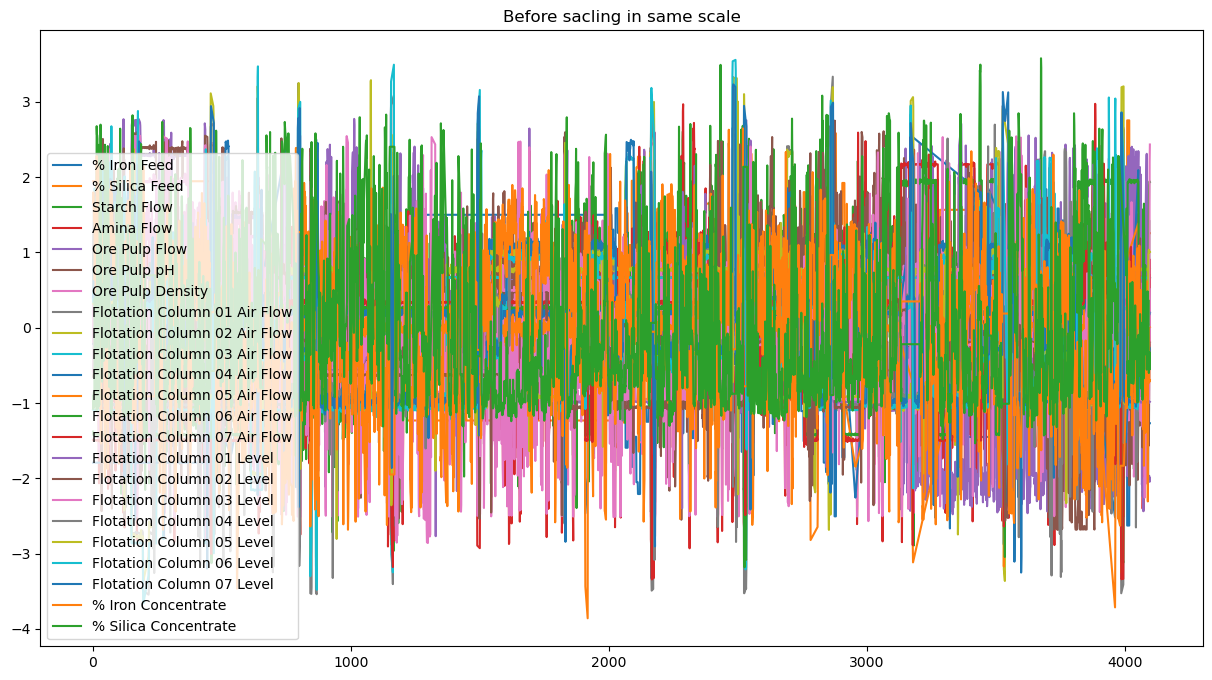

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

x = [*range(1, 4098, 1)]


def demo(sty, i, x):
    mpl.style.use(sty)
    fig, ax = plt.subplots( figsize=(15, 8))
    
   

    ax.set_title('Before sacling in same scale'.format(sty))
    
    for i in column:  
        ax.plot(x, f[i],  label=i)
    ax.legend()
    

demo('default', i, x)

In [799]:
#After sacling in same scale

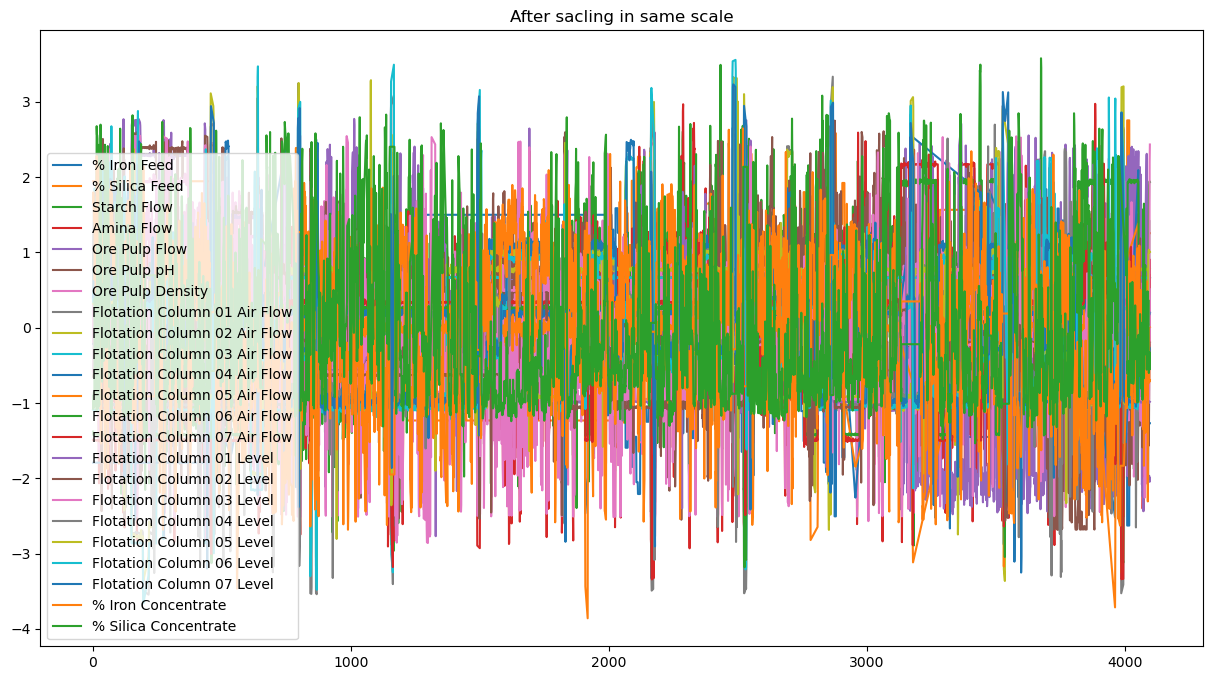

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

x = [*range(1, 4098, 1)]

def demo(sty, i, x):
    mpl.style.use(sty)
    fig, ax = plt.subplots( figsize=(15, 8))
    ax.set_title('After sacling in same scale'.format(sty))
    
    for i in column:  
        ax.plot(x, f[i],  label=i)
    ax.legend()
demo('default', i, x)

# Week 4-6: Modeling Plan

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

### PCR
##### 1. Dividte dataset into training and test sample

In [735]:
df=pd.read_csv('afterdownsampling.csv') 
target = '% Silica Concentrate'
X = df.drop(target,axis=1)
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Run standardization on X variables
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)
X.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate
0,55.2,16.98,3162.625026,578.786678,398.753368,10.113487,1.729558,251.166672,250.226086,250.178287,...,251.232529,250.208184,450.383776,446.891845,450.474523,449.912259,455.792161,464.383310,450.532747,66.91
1,55.2,16.98,3133.256389,537.219661,399.871822,10.129742,1.667784,249.880589,250.214050,250.033317,...,249.909494,249.897572,449.373361,450.249356,450.081222,450.328806,448.722983,455.501528,451.387700,67.06
2,55.2,16.98,3479.482944,591.906744,398.763806,10.048403,1.732711,250.161328,250.104167,250.046350,...,250.242161,250.484183,449.972878,450.868711,450.901822,451.145822,451.134189,459.981311,450.296722,66.97
3,55.2,16.98,3228.036436,593.170106,399.866983,9.918614,1.731056,250.208772,250.204761,250.120861,...,249.825122,250.157622,487.940706,491.462111,487.387206,494.528183,495.664011,502.763850,494.939889,66.75
4,55.2,16.98,3327.280739,619.710806,399.615089,9.746029,1.765879,249.917800,250.160494,250.013500,...,250.249600,250.078639,549.031539,549.983156,549.459572,549.975483,549.512533,560.696300,550.271772,66.63


#### Function creation for cross validation and Linear Regression

In [736]:
# Define cross-validation folds
cv = KFold(n_splits=10, shuffle=True, random_state=42)


# Linear Regression
lin_reg = LinearRegression().fit(X_train_scaled, y_train)
lr_score_train = -1 * cross_val_score(lin_reg, X_train_scaled, y_train, cv=cv, scoring='neg_root_mean_squared_error').mean()
lr_score_test = mean_squared_error(y_test, lin_reg.predict(X_test_scaled), squared=False)


In [737]:
# Generate all the principal components
pca = PCA() # Default n_components = min(n_samples, n_features)
X_train_pc = pca.fit_transform(X_train_scaled)

# View first 5 rows of all principal components
pd.DataFrame(pca.components_.T).loc[:4,:]

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.047254,-0.041941,-0.457574,0.468376,-0.137587,0.142140,-0.026310,-0.084942,-0.100856,-0.059005,...,-0.010258,-0.000189,0.008202,-0.003501,-0.022870,0.003787,0.010490,0.018509,-0.229381,0.671146
1,-0.058343,0.042330,0.459303,-0.455392,0.145255,-0.152848,0.048017,0.096605,0.109352,0.067104,...,0.013760,0.016497,0.023437,0.002805,0.004051,0.049808,-0.075128,0.051714,-0.210851,0.666867
2,-0.167520,0.038420,-0.314363,-0.232610,0.000338,0.197711,0.143296,-0.227652,0.528074,0.172668,...,0.079877,0.050372,-0.006632,-0.035362,0.022289,0.004198,-0.047700,0.034573,0.022208,-0.014239
3,-0.128897,-0.171869,-0.211914,-0.386131,-0.375406,0.143575,-0.120690,0.175265,-0.207287,0.097037,...,0.084511,0.580206,-0.139402,0.259406,-0.220311,-0.009696,0.079668,0.030400,-0.024490,-0.002051
4,0.046144,-0.122049,-0.342875,-0.070434,0.062916,-0.255600,0.064574,0.767141,-0.078732,0.261357,...,-0.020156,-0.233386,0.116476,-0.072429,0.107584,0.002230,-0.053595,-0.021425,0.016395,-0.008745


In [738]:
# Visually determine optimal number of principal components

mse_pcr = []
for i in range(21):
    best_pc_num = i+1

    # Train model with first  principal components
    lin_reg_pc = LinearRegression().fit(X_train_pc[:,:best_pc_num], y_train)

    # Get cross-validation RMSE (train set)
    pcr_score_train = -1 * cross_val_score(lin_reg_pc, 
                                           X_train_pc[:,:best_pc_num], 
                                           y_train, 
                                           cv=cv, 
                                           scoring='neg_root_mean_squared_error').mean()

    # Train model on training set
    lin_reg_pc = LinearRegression().fit(X_train_pc[:,:best_pc_num], y_train)

    # Get  principal components of test set
    X_test_pc = pca.transform(X_test_scaled)[:,:best_pc_num]

    # Predict on test data
    preds = lin_reg_pc.predict(X_test_pc)
    pcr_score_test = mean_squared_error(y_test, preds)
    mse_pcr.append(pcr_score_test)

    print('mean_squared_error','with PC number', i+1,':', pcr_score_test)

mean_squared_error with PC number 1 : 1.2941344159576758
mean_squared_error with PC number 2 : 1.1466921744665834
mean_squared_error with PC number 3 : 1.0726066345903815
mean_squared_error with PC number 4 : 1.0702670120200368
mean_squared_error with PC number 5 : 1.0650422012730407
mean_squared_error with PC number 6 : 0.8264788449078837
mean_squared_error with PC number 7 : 0.7336137521098713
mean_squared_error with PC number 8 : 0.5946614008024075
mean_squared_error with PC number 9 : 0.4869165731362718
mean_squared_error with PC number 10 : 0.43129873868902163
mean_squared_error with PC number 11 : 0.4309568470270762
mean_squared_error with PC number 12 : 0.4189091010415173
mean_squared_error with PC number 13 : 0.4189282529499689
mean_squared_error with PC number 14 : 0.41607722268044817
mean_squared_error with PC number 15 : 0.4155184767374524
mean_squared_error with PC number 16 : 0.4140282297030072
mean_squared_error with PC number 17 : 0.413140470303283
mean_squared_error wit

(-1.0, 22.0)

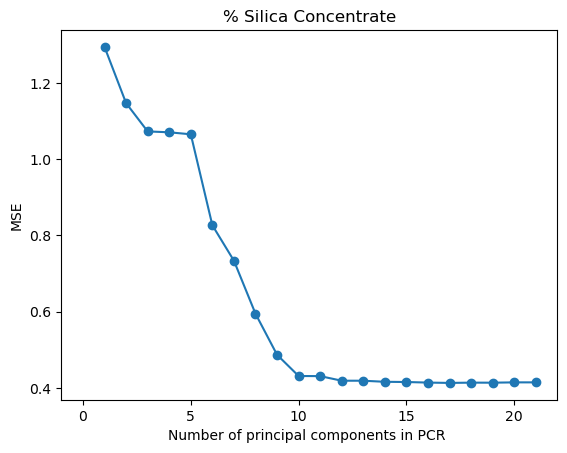

In [739]:
# Plot results
plt.plot(np.arange(1, len(X.columns)), np.array(mse_pcr), '-o')
plt.xlabel('Number of principal components in PCR ')
plt.ylabel('MSE')
plt.title('% Silica Concentrate')
plt.xlim(xmin=-1)

In [740]:
#Pca coefficient
pca.explained_variance_ratio_

array([0.29615344, 0.14193352, 0.10035556, 0.09141477, 0.05536995,
       0.05163233, 0.04925935, 0.03889162, 0.03074262, 0.02767824,
       0.02148904, 0.01952025, 0.0144304 , 0.0122788 , 0.01160807,
       0.01011917, 0.00798173, 0.00667372, 0.00643202, 0.00323462,
       0.00165223, 0.00114852])

### To investigate the most important variables in prediction;

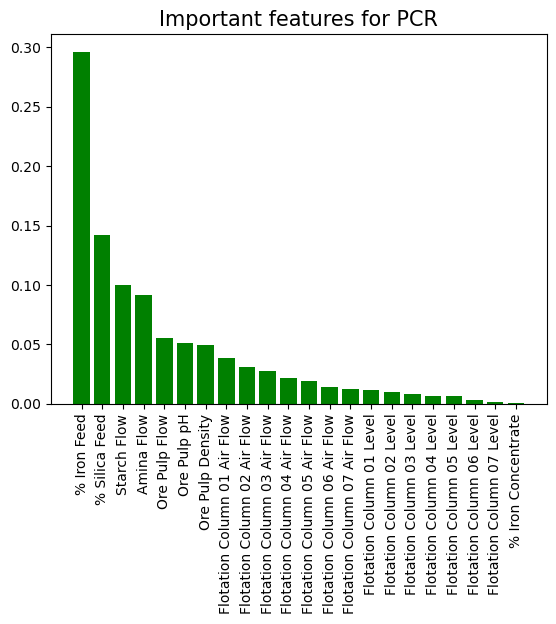

In [741]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(pca.explained_variance_ratio_)
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='green')
plt.title('Important features for PCR', size=15)
plt.xticks(rotation='vertical')
plt.show()

In [800]:
# less_important_variable PCR

In [742]:
less_important_variable_pcr=[]
for i in importances['Attribute'][12:22]:
    less_important_variable_pcr.append(i)
print(less_important_variable_pcr)

['Flotation Column 06 Air Flow', 'Flotation Column 07 Air Flow', 'Flotation Column 01 Level', 'Flotation Column 02 Level', 'Flotation Column 03 Level', 'Flotation Column 04 Level', 'Flotation Column 05 Level', 'Flotation Column 06 Level', 'Flotation Column 07 Level', '% Iron Concentrate']


- Here we see most imprtant features in our analysis, here Iron_Feed is the most important feaature and lowest importaantce feature is Iron_concentration. However how we will determine how many fearue we will reduce in final model training? From previous mean square error result we have seen after using PC 12 components meaan square error remains almost same. There for we will keep first 12 importance feaature in our dataset for final calculation.

In [119]:
### precition result with all feaatures without reduction

In [743]:
OriginalVsPredictedlabel = pd.DataFrame({'Original label':y_test, 'predicted label': preds})
OriginalVsPredictedlabel

,Original label,predicted label
1299,2.09,3.253628
1338,2.32,2.018521
3875,2.14,2.646588
2083,1.18,2.479912
1498,1.90,1.858070
...,...,...
1767,1.29,0.394522
3812,4.06,3.937004
2629,1.41,1.565818
1427,1.63,2.222640


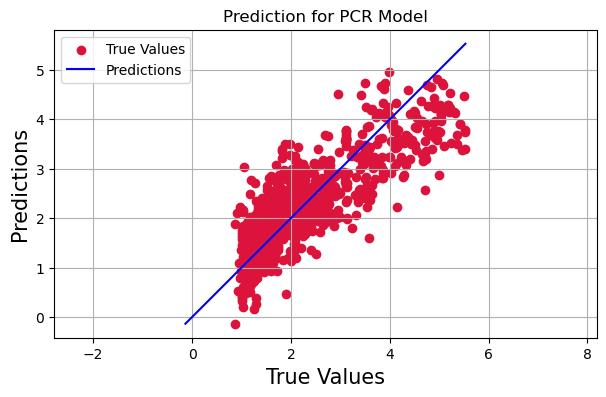

In [744]:
#plot Original lavel and Predicticted level fit curve
plt.figure(figsize=(7,4))
true_value=y_test
predicted_value=preds
plt.scatter(true_value, predicted_value, c='crimson')
p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.legend(['True Values','Predictions'])
plt.title('Prediction for PCR Model')
plt.grid()
plt.show()

# PLS

In [745]:
#partial Least Squares regression (PLS) 
df=pd.read_csv('afterdownsampling.csv') 
target = '% Silica Concentrate'
X = df.drop(target,axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Run standardization on X variables
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)
X.head()

from sklearn.cross_decomposition import PLSRegression

X = X_train
Y = y_train

PLSR = PLSRegression(n_components=22).fit(X_train_scaled , Y)

y_pred = PLSR.predict(X_test_scaled)

PLS_score_test = mean_squared_error(y_test, y_pred)

print('mean_squared_error','with PLS Methods',':', PLS_score_test)


mean_squared_error with PLS Methods : 0.4119085615098681


(-1.0, 22.0)

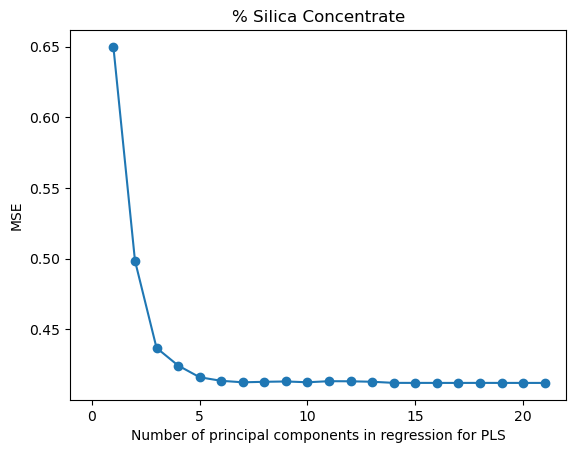

In [746]:
mse_pls = []
for i in np.arange(1, len(X.columns)):
    pls2 = PLSRegression(n_components=i)
    pls2.fit(X_train_scaled, y_train)
    y_pred = pls2.predict(X_test_scaled)
    score=mean_squared_error(y_test,y_pred)
    mse_pls.append(score)

# Plot results
plt.plot(np.arange(1, len(X.columns)), np.array(mse_pls), '-o')
plt.xlabel('Number of principal components in regression for PLS')
plt.ylabel('MSE')
plt.title('% Silica Concentrate')
plt.xlim(xmin=-1)

In [720]:
mse_pls

[0.6498665659525694,
 0.4984594356322918,
 0.43670754072475243,
 0.42423747693824204,
 0.41591352401006654,
 0.4134081314869409,
 0.41234562796178903,
 0.4126948636138632,
 0.4129384757447344,
 0.4123737912349771,
 0.41313610146986973,
 0.4130593022080134,
 0.41273578117235526,
 0.41194227518701265,
 0.4119221888497981,
 0.4119179406304759,
 0.41190870655762973,
 0.41192791554757974,
 0.4119125784875118,
 0.41190823106852453,
 0.4119084746315305]

In [721]:
pls_coef = np.array(pls2.coef_).ravel()
print(pls_coef)

[ 0.12435814  0.18975482 -0.03750372  0.09728593  0.04291893  0.01413198
  0.00192376 -0.17592002 -0.043936   -0.00666981  0.00484737  0.05427228
 -0.02833947  0.0762356  -0.03619282 -0.02655193 -0.01634138 -0.01332753
 -0.03268283 -0.02260637  0.04585933 -0.87332521]


In [802]:
#important variable for PLS

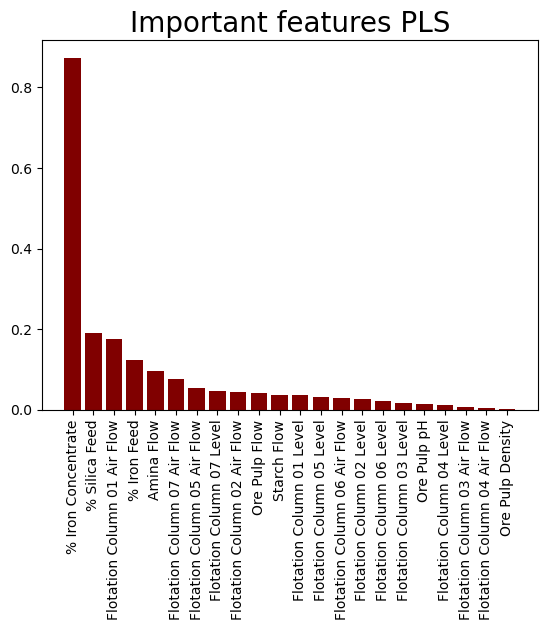

In [722]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(pls_coef)
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='maroon')
plt.title('Important features PLS', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [803]:
# less_important_variable_pls

In [725]:
less_important_variable_pls=[]
for i in importances['Attribute'][5:22]:
    less_important_variable_pls.append(i)
print(less_important_variable_pls)

['Flotation Column 07 Air Flow', 'Flotation Column 05 Air Flow', 'Flotation Column 07 Level', 'Flotation Column 02 Air Flow', 'Ore Pulp Flow', 'Starch Flow', 'Flotation Column 01 Level', 'Flotation Column 05 Level', 'Flotation Column 06 Air Flow', 'Flotation Column 02 Level', 'Flotation Column 06 Level', 'Flotation Column 03 Level', 'Ore Pulp pH', 'Flotation Column 04 Level', 'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow', 'Ore Pulp Density']


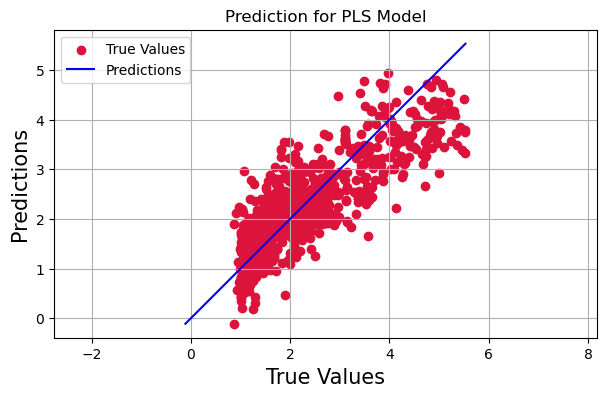

In [726]:
plt.figure(figsize=(7,4))
true_value=y_test
predicted_value=y_pred
plt.scatter(true_value, predicted_value, c='crimson')
p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.legend(['True Values','Predictions'])
plt.title('Prediction for PLS Model')
plt.grid()
plt.show()

In [805]:
# PLS and PCR MSE error comparision with different number of variable

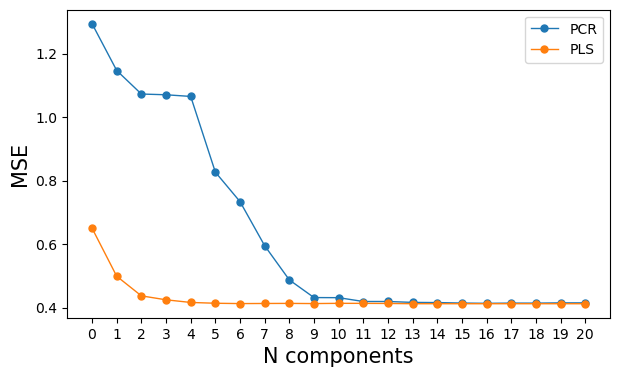

In [727]:
plt.figure(figsize=(7, 4))
plt.plot(mse_pcr,label = "PCR",marker='.', linewidth=1, markersize=10)
plt.plot(mse_pls,label = "PLS",marker='.', linewidth=1, markersize=10)
plt.xticks(np.arange(0,len(mse_pls),1.0))
plt.ylabel('MSE', fontsize=15)
plt.xlabel('N components', fontsize=15)
plt.legend()
plt.show()

## To reduce the variables of the initial dataset, and test with model prediction of Silican concentration

- First we will reduce 10 less important  varibale  that we have already got in PCR
- then we will apply LR model with this recured  daataset

### PCR model performance after  variable redction

In [747]:
df=pd.read_csv('afterdownsampling.csv') 
target = '% Silica Concentrate'
### reduced less important feaatures
X = df.drop(target,axis=1)
X = X.drop(less_important_variable_pcr, axis=1)
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Run standardization on X variables
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)
X.head(10)

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow
0,55.20,16.98,3162.625026,578.786678,398.753368,10.113487,1.729558,251.166672,250.226086,250.178287,295.096,306.4
1,55.20,16.98,3133.256389,537.219661,399.871822,10.129742,1.667784,249.880589,250.214050,250.033317,295.096,306.4
2,55.20,16.98,3479.482944,591.906744,398.763806,10.048403,1.732711,250.161328,250.104167,250.046350,295.096,306.4
3,55.20,16.98,3228.036436,593.170106,399.866983,9.918614,1.731056,250.208772,250.204761,250.120861,295.096,306.4
4,55.20,16.98,3327.280739,619.710806,399.615089,9.746029,1.765879,249.917800,250.160494,250.013500,295.096,306.4
5,55.20,16.98,3405.162222,621.878539,399.749344,9.892237,1.765064,249.898294,250.111022,250.075383,295.096,306.4
6,54.95,17.40,2865.878428,618.186367,400.345133,10.180426,1.765422,250.350667,250.276594,250.066844,295.096,306.4
7,54.95,17.40,3306.753627,595.680983,400.128744,10.180203,1.766156,249.806094,250.236878,250.009028,295.096,306.4
8,54.95,17.40,3784.487111,592.367983,400.278467,9.940503,1.760050,250.063789,249.903689,250.005444,295.096,306.4
9,54.95,17.40,3316.753911,582.906094,399.773667,10.104197,1.761051,250.096767,250.002978,250.046239,295.096,306.4


In [748]:
# Train regression model on training data 
LR = LinearRegression().fit(X_train_scaled, y_train)
# Prediction with test data
pred_pcr = LR.predict(X_test_scaled)
pcr_MSE = mean_squared_error(y_test, pred_pcr)
pcr_MSE


1.1481715578898202

### PLS model performance after variable reduction
- we will only keep 5 important variables. We will remove 17 variables from the dataset, this number, and the variable name we have attained from the previous experiment.

In [730]:
less_important_variable_pls

['Flotation Column 07 Air Flow',
 'Flotation Column 05 Air Flow',
 'Flotation Column 07 Level',
 'Flotation Column 02 Air Flow',
 'Ore Pulp Flow',
 'Starch Flow',
 'Flotation Column 01 Level',
 'Flotation Column 05 Level',
 'Flotation Column 06 Air Flow',
 'Flotation Column 02 Level',
 'Flotation Column 06 Level',
 'Flotation Column 03 Level',
 'Ore Pulp pH',
 'Flotation Column 04 Level',
 'Flotation Column 03 Air Flow',
 'Flotation Column 04 Air Flow',
 'Ore Pulp Density']

In [731]:
df=pd.read_csv('afterdownsampling.csv') 
target = '% Silica Concentrate'
### reduced less important feaatures
X = df.drop(target,axis=1)
X = X.drop(less_important_variable_pls, axis=1)
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Run standardization on X variables
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

# we will use this same test data for all experiemtn  to compare the result
same_test_x_data=X_test_scaled
same_test_y_data=y_test

X_train

,% Iron Feed,% Silica Feed,Amina Flow,Flotation Column 01 Air Flow,% Iron Concentrate
2226,49.69,26.68,559.643006,299.776739,65.280
2247,56.00,13.81,355.017522,300.070622,66.640
221,59.72,9.22,556.517267,199.969189,64.030
2867,55.73,14.36,610.086679,299.763106,66.130
2468,55.69,15.18,543.564233,299.851194,66.590
...,...,...,...,...,...
3772,60.02,8.87,393.149528,299.984739,65.530
1095,56.65,14.83,502.100311,250.042228,65.360
1130,56.65,14.83,479.717344,250.056989,62.560
1294,64.03,6.26,482.768394,250.018122,65.220


In [732]:
plsR1 = PLSRegression(n_components=1).fit(X_train_scaled, y_train)
y_pred = plsR1.predict(X_test_scaled)

pred_pls=[]
for i in y_pred:
    pred_pls.append(i[0])
pls_MSE = mean_squared_error(y_test,pred_pls)
pls_MSE

0.45165938722809096

In [733]:
OriginalVsPredictedlabel = pd.DataFrame({'Original label':y_test, 'predicted label by PCR': pred_pcr, 'predicted label by PLS': pred_pls})
OriginalVsPredictedlabel

,Original label,predicted label by PCR,predicted label by PLS
1299,2.09,2.288331,2.864514
1338,2.32,2.773141,1.914765
3875,2.14,2.752939,2.974309
2083,1.18,2.418110,2.221342
1498,1.90,1.645040,1.711748
...,...,...,...
1767,1.29,1.319764,0.261347
3812,4.06,2.799984,3.977108
2629,1.41,2.030542,1.746782
1427,1.63,1.825720,1.919045


### Our verdict for choosing models PCR Vs PLS

- After analysing PCR and PLS we find PLS work better even with only 5 components where as similar prediction score we get from  PCR with 12 components. Therefore we are going to use PLS model for minimum sampling frequency analysis.

### Minimum sampling frequency

In [807]:
# minimum_sampling_frequency main code here

In [473]:
import math
def minimum_sampling_frequency(time): 
    df=pd.read_csv('afterdownsampling.csv')
    df = df.drop(less_important_variable_pls, axis=1)
    df_train=df.head(2500)
    target = '% Silica Concentrate'
    
    test_x = df.drop(target,axis=1).tail(1000)
    test_y = df[target].tail(1000)
    x_test_scaled = scale(test_x)
    

    ### sampling 
    frquency_interval =df_train.iloc[1::time]
    x_train = frquency_interval.drop(target,axis=1)
    y_train = frquency_interval[target]
    
    
    # Run standardization on X variables
    x_train_scaled = scale(x_train)
    
   
    PLSR = PLSRegression(n_components=6).fit(x_train_scaled, y_train)
    y_pred = PLSR.predict(x_test_scaled)

    pred_pls_f=[]
    for i in y_pred:
        pred_pls_f.append(i[0])
    pls_MSE = mean_squared_error(test_y,pred_pls_f)
    
    return [pls_MSE, len(x_train_scaled), len(x_test_scaled), time]


In [474]:
predictions=[]
train_size=[]
frequency=[]
test_size=[]
for i in range(150):
    frequency.append(minimum_sampling_frequency(i+1)[3])
    train_size.append(minimum_sampling_frequency(i+1)[1])
    predictions.append(minimum_sampling_frequency(i+1)[0])
    test_size.append(minimum_sampling_frequency(i+1)[2])
    

C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_

C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_

C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_

C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_

C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_

C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_

C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_

C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_

C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_

C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_

C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_

C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_

C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_

C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_

C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_

C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_

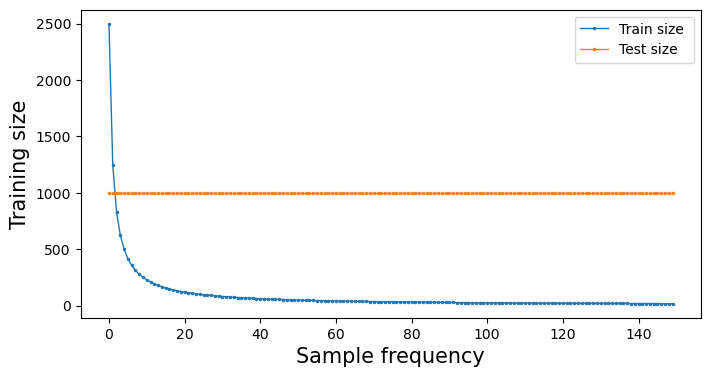

In [626]:
plt.figure(figsize=(8, 4))
plt.plot(train_size[:150],label = "Train size ", marker='.', linewidth=1, markersize=3)
plt.plot(test_size[:150],label = "Test size ", marker='.', linewidth=1, markersize=3)
plt.ylabel('Training size', fontsize=15)
plt.xlabel('Sample frequency', fontsize=15)
plt.legend()
plt.show()

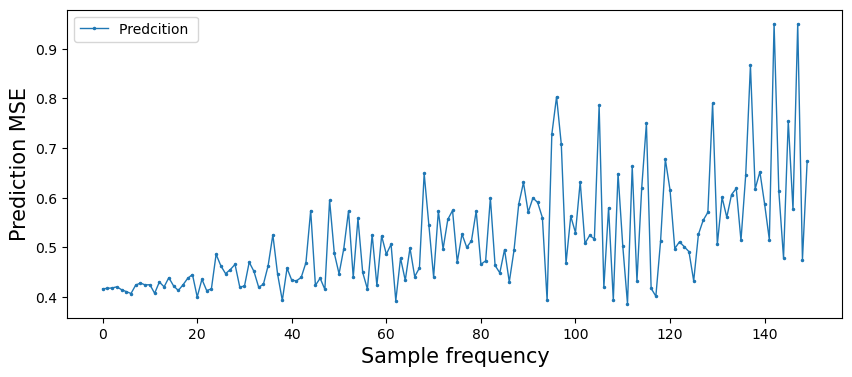

In [628]:
plt.figure(figsize=(10, 4))
plt.plot(predictions[:150],label = "Predcition ", marker='.', linewidth=1, markersize=3)
# plt.xticks(np.arange(0,len(predictions[:150]),1.0))
plt.ylabel('Prediction MSE', fontsize=15)
plt.xlabel('Sample frequency', fontsize=15)
plt.legend()
plt.show()

- For minimum sampling frequency analysis, we collected a test sample size of 1000 from the end of the dataset; we kept this sample test data the same for all sample frequency tests so that we could compare our results. It is essential since if test data changes, there might be no ground truth for comparison. Now we sample train data at different frequencies (0 to 150). We start prediction with at  1-hour interval of time data. The graph shows that the model can predict at 25 sampling frequencies where MSE is still under 0.5. Therefore we can assume a sampling frequency of 25, that means we take a sample every 25 hours intervals, and the model actually does not affect much. Another observation is that we can see some good predictions at 140 samples as well, even in that case, the training sample is less than 500. This result is hard to describe since the model can predict even after 140 hours interval sample if there are enough train data. 

### lag future predciton

### Methos 1
-First, 100 data for train and second 100 data for test. In this way we fixed 2k test data same  for all  lag test experiments.  Rest of the data collected for the test and we made 150 different lagged  sample test sets, which start 1 hours to 150 hours. This first methods ensure we have taken the same proportion of train and test data from throughout the dataset.


In [597]:
import math
def lag_tain_data(time): 
    df=pd.read_csv('afterdownsampling.csv')
    df = df.drop(less_important_variable_pls, axis=1)   
    ### reduced less important feaatures
    lag_train =df.iloc[time::200]
    
    return lag_train


In [598]:
lag_test=[]
for i in range(150,300):
    lag_test.append(lag_tain_data(i+1))


In [599]:
len(lag_test)

150

In [600]:
lag_test[0]

,% Iron Feed,% Silica Feed,Amina Flow,Flotation Column 01 Air Flow,% Iron Concentrate,% Silica Concentrate
151,60.18,9.34,474.656322,200.019311,66.640000,1.330000
351,57.34,13.06,527.928422,249.948572,65.280000,2.140000
551,53.04,18.56,572.109939,250.095306,65.700000,1.720000
751,55.17,14.35,600.117906,250.141139,63.766235,4.984278
951,53.25,21.17,496.447822,299.918622,65.480000,2.690000
1151,52.61,20.24,367.426439,249.996189,62.870000,5.030000
1351,64.03,6.26,429.183061,250.201389,63.129436,4.260000
1551,64.03,6.26,522.345378,300.058600,65.490000,1.230000
1751,64.03,6.26,388.529139,299.627244,66.320000,1.370000
1951,64.03,6.26,568.160839,300.204389,65.070000,1.530000


In [601]:
# all_lag_train= [for df in lag_trains]
all_lag_test=pd.concat(lag_test)
all_lag_test

,% Iron Feed,% Silica Feed,Amina Flow,Flotation Column 01 Air Flow,% Iron Concentrate,% Silica Concentrate
151,60.18,9.34,474.656322,200.019311,66.640000,1.330000
351,57.34,13.06,527.928422,249.948572,65.280000,2.140000
551,53.04,18.56,572.109939,250.095306,65.700000,1.720000
751,55.17,14.35,600.117906,250.141139,63.766235,4.984278
951,53.25,21.17,496.447822,299.918622,65.480000,2.690000
...,...,...,...,...,...,...
3100,57.46,10.80,547.849964,300.084811,64.420000,3.000000
3300,48.81,25.31,447.065050,299.915722,64.220000,1.580000
3500,49.68,24.04,535.222183,298.724728,65.110000,2.060000
3700,60.56,6.92,404.340644,300.035014,65.630000,1.790000


In [602]:
df=pd.read_csv('afterdownsampling.csv')
df1 = df.drop(less_important_variable_pls, axis=1)  

df2 = pd.concat([df1, all_lag_test])

train_fixed=df2.drop_duplicates(keep=False)

train_fixed

,% Iron Feed,% Silica Feed,Amina Flow,Flotation Column 01 Air Flow,% Iron Concentrate,% Silica Concentrate
0,55.20,16.98,578.786678,251.166672,66.91,1.31
1,55.20,16.98,537.219661,249.880589,67.06,1.11
2,55.20,16.98,591.906744,250.161328,66.97,1.27
3,55.20,16.98,593.170106,250.208772,66.75,1.36
4,55.20,16.98,619.710806,249.917800,66.63,1.34
...,...,...,...,...,...,...
3946,55.99,15.13,541.285367,299.721117,64.83,1.76
3947,55.99,15.13,532.050789,299.817300,64.69,3.02
3948,55.99,15.13,565.068750,299.814256,64.86,2.70
3949,55.99,15.13,527.600544,299.817094,64.64,2.25


In [606]:
def lag_experiment(test):
    target = '% Silica Concentrate'

    x_train= train_fixed.drop(target,axis=1)
    y_train = train_fixed[target]
    
    x_test = test.drop(target,axis=1)
    y_test = test[target]


    # Run standardization on X variables
    x_train_scaled = scale(x_train)
    x_test_scaled = scale(x_test)


    PLSR = PLSRegression(n_components=6).fit(x_train_scaled, y_train)
    y_pred = PLSR.predict(x_test_scaled)

    pred_pls_f=[]
    for i in y_pred:
        pred_pls_f.append(i[0])
    pls_MSE = mean_squared_error(y_test,pred_pls_f)
    
#     print(pls_MSE)
    
    return pls_MSE



In [607]:
lag_mse=[]
for i in range(150):
    lag_mse.append(lag_experiment(lag_test[i]))

C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_

C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_

C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_

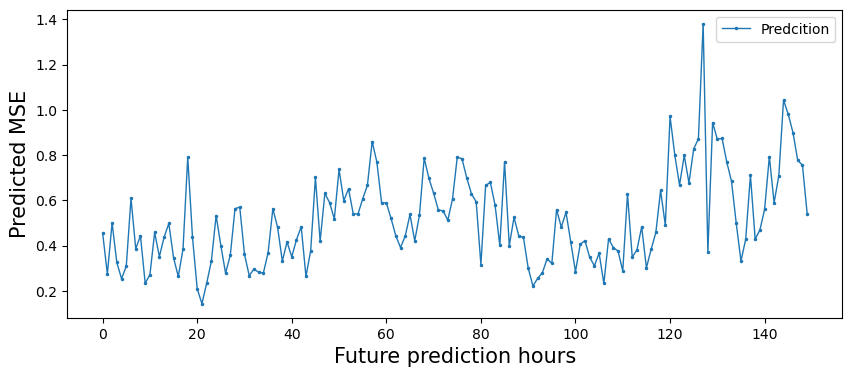

In [629]:
plt.figure(figsize=(10, 4))
plt.plot(lag_mse,label = "Predcition", marker='.', linewidth=1, markersize=3)
# plt.xticks(np.arange(0,len(predictions[:150]),1.0))
plt.ylabel('Predicted MSE', fontsize=15)
plt.xlabel('Future prediction hours', fontsize=15)
plt.legend()
plt.show()

### Method 2
- Second approach, We have approximately 4000 datasets. We have taken the first 2500 data as training data and made different test samples from the end of the dataset for testing. Each row has (1) an hour time interval. We have made a total of 1000 test data that size varies from  500-1500 test samples. When the test sample is the last 500, and the training sample is the first 2500, the time difference is 1000 samples, which means we will predict 1000 hours ahead. When the training sample is first 2500, and the test sample is last 1500, then there would be zero time difference.


In [794]:
def lag_exp(lag):
    df=pd.read_csv('afterdownsampling.csv')
    df = df.drop(less_important_variable_pls, axis=1)
    df_train=df.head(2500)
    target = '% Silica Concentrate'

    test_x = df.drop(target,axis=1).tail(lag)
    test_y = df[target].tail(lag)
    x_test_scaled = scale(test_x)


    ### reduced less important feaatures

    x_train = df_train.drop(target,axis=1)
    y_train = df_train[target]


    # Run standardization on X variables
    x_train_scaled = scale(x_train)


    PLSR = PLSRegression(n_components=6).fit(x_train_scaled, y_train)
    y_pred = PLSR.predict(x_test_scaled)

    pred_pls_f=[]
    for i in y_pred:
        pred_pls_f.append(i[0])
    pls_MSE = mean_squared_error(test_y,pred_pls_f)

#     print(pls_MSE)    
    return pls_MSE

In [795]:
lag_mse=[]
for i in range(500,1500,1):
    lag_mse.append(lag_exp(i))

C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_

C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_

C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_

C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_

C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_

C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_

C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_

C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_

C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_

C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_

C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_

C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_

C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_

C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_

C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_

C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_

C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_

C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_

C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_

C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_

C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_

C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_

C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_

C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_

C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_

C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_

C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_

C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_

C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_

C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_

C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_components=5 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(6) should be in [1, n_features].n_

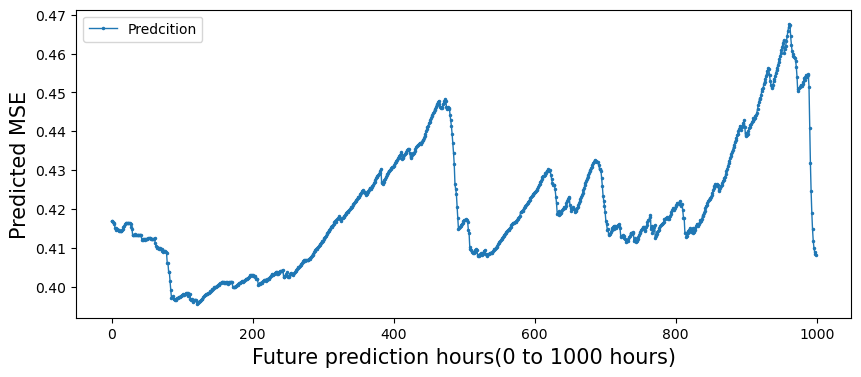

In [798]:
plt.figure(figsize=(10, 4))
plt.plot(list(reversed(lag_mse)),label = "Predcition", marker='.', linewidth=1, markersize=3)
# plt.xticks(np.arange(0,len(predictions[:150]),1.0))
plt.ylabel('Predicted MSE', fontsize=15)
plt.xlabel('Future prediction hours(0 to 1000 hours)', fontsize=15)
plt.legend()
plt.show()